In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("ehailshare.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
data.shape

(693071, 57)

In [7]:
data.duplicated().sum()

0

In [8]:
#Return columns wilth nulls
null_columns = data.columns[data.isna().sum() > 0]
print(null_columns)

Index(['price'], dtype='object')


In [9]:
nan_cab_type = data[data['price'].isnull()]['cab_type']
nan_cab_type

18        Uber
31        Uber
40        Uber
60        Uber
69        Uber
          ... 
693025    Uber
693047    Uber
693049    Uber
693060    Uber
693068    Uber
Name: cab_type, Length: 55095, dtype: object

In [10]:
nan_columns = data[data.columns[data.isnull().any()]]
nan_columns

,price
0,5.0
1,11.0
2,7.0
3,26.0
4,9.0
...,...
693066,13.0
693067,9.5
693068,NaN
693069,27.0


In [11]:
# Calculate the mean of the 'price' column
mean_price = data['price'].mean().round()

# Replace missing values with the mean
data['price'] = data['price'].fillna(mean_price)

print(mean_price)

17.0


In [12]:
# Replace the binary values in 'ID' column with 'no_description'
data.loc[data['product_id'].str.contains('^[01]+$'), 'product_id'] = 'no_description'

In [13]:
data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [14]:
data["cab_type"].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [15]:
data["name"].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [16]:
data['datetime']= pd.to_datetime(data['datetime'])
data['Year'] = data['datetime'].dt.year
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Year
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,2018
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,2018
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,2018
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,2018
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,2018


In [17]:
import calendar
d = dict(enumerate(calendar.month_abbr))
data['month'] = data['month'].map(d)

In [18]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Year
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,Dec,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,2018
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,Nov,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,2018
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,Nov,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,2018
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,Nov,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,2018
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,Nov,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,2018


In [19]:
data.to_csv('ehailshare_cleaned.csv')
print('The CSV file has been exported successfully.')

The CSV file has been exported successfully.


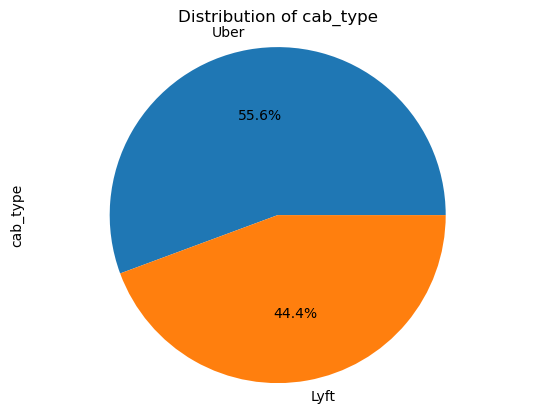

In [20]:
# Calculate the distribution of 'cab_type'
distribution = data['cab_type'].value_counts()

# Plot a pie chart of the distribution
distribution.plot.pie(labels=distribution.index, autopct='%1.1f%%')

# Set the aspect ratio to be equal to ensure a circular pie
plt.axis('equal')

# Add a title to the chart
plt.title('Distribution of cab_type')

# Display the chart
plt.show()

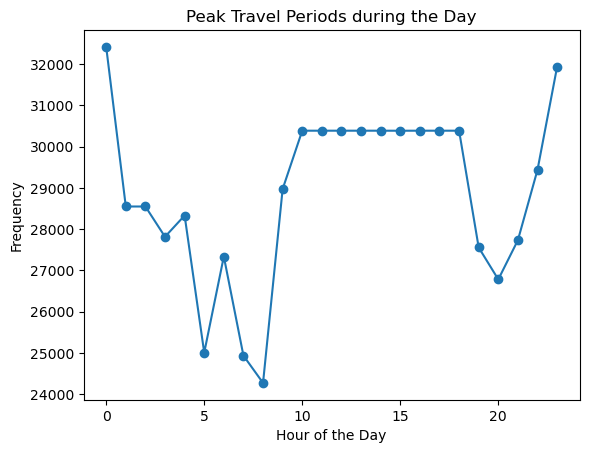

In [21]:
# Peak travel periods during the day
hour_counts = data['hour'].value_counts().sort_index()
hour_counts.plot(kind='line', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Peak Travel Periods during the Day')
plt.show()

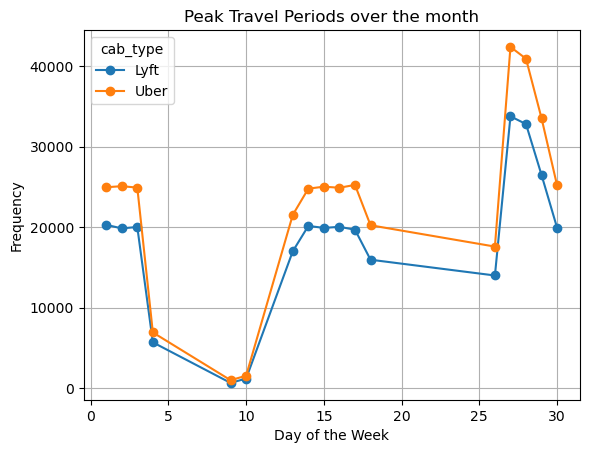

In [22]:
# Create a line graph using pandas
data.groupby(['day', 'cab_type']).size().unstack().plot(kind='line', marker='o')

# Customize the plot
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Peak Travel Periods over the month')
plt.grid(True)

# Display the plot
plt.show()

In [23]:
data['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

## Average price

In [24]:
data['price'].sum().round()

11492008.0

In [25]:
# Assuming you have a DataFrame called 'data' with columns 'Region' and 'cab_type'

# Group the data by the 'Region' column
grouped_data = data.groupby('destination')['cab_type']

# Calculate the distribution of transportation modes within each group
transportation_distribution = grouped_data.value_counts(normalize=True)

# Print the distribution of transportation modes across different regions or demographics
print(transportation_distribution)


destination              cab_type
Back Bay                 Uber        0.556075
                         Lyft        0.443925
Beacon Hill              Uber        0.556399
                         Lyft        0.443601
Boston University        Uber        0.556575
                         Lyft        0.443425
Fenway                   Uber        0.556417
                         Lyft        0.443583
Financial District       Uber        0.554162
                         Lyft        0.445838
Haymarket Square         Uber        0.556592
                         Lyft        0.443408
North End                Uber        0.556514
                         Lyft        0.443486
North Station            Uber        0.556610
                         Lyft        0.443390
Northeastern University  Uber        0.556419
                         Lyft        0.443581
South Station            Uber        0.556356
                         Lyft        0.443644
Theatre District         Uber        0.558185


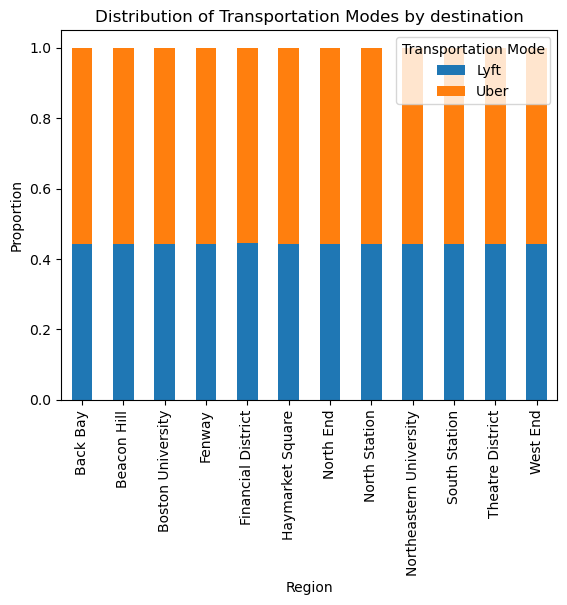

In [26]:
# Group the data by the 'Region' column
grouped_data = data.groupby('destination')['cab_type'].value_counts(normalize=True).unstack()

# Plot a stacked bar graph
grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Transportation Modes by destination')
plt.legend(title='Transportation Mode')

# Display the plot
plt.show()

In [27]:
grouped_data = data.groupby(['source', 'cab_type'])['id'].nunique().unstack()
print(grouped_data)

cab_type                  Lyft   Uber
source                               
Back Bay                 25655  32137
Beacon Hill              25464  31939
Boston University        25620  32144
Fenway                   25620  32137
Financial District       26237  32620
Haymarket Square         25614  32122
North End                25620  32143
North Station            25326  31792
Northeastern University  25614  32142
South Station            25620  32130
Theatre District         25530  32283
West End                 25488  32074


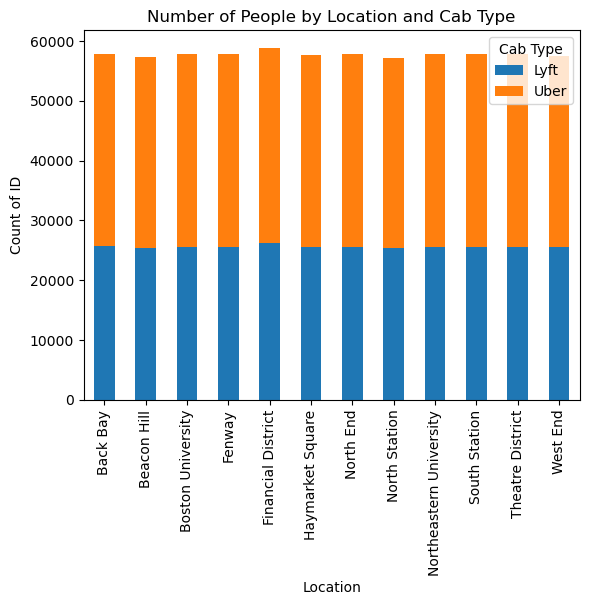

In [28]:
# Group the data by 'source' and 'cab_type', and count the number of unique 'ID' values
grouped_data = data.groupby(['source', 'cab_type'])['id'].nunique().unstack()

# Plot a stacked bar graph
grouped_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Location')
plt.ylabel('Count of ID')
plt.title('Number of People by Location and Cab Type')
plt.legend(title='Cab Type')

# Display the plot
plt.show()

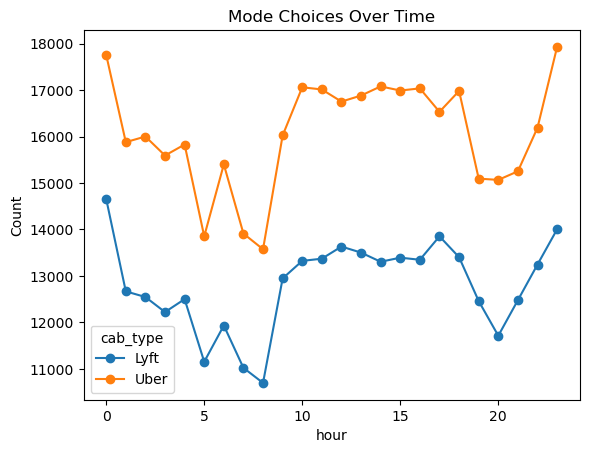

In [29]:
# Group the data by the 'Time' column and calculate the count of each mode choice within each time group
time_grouped = data.groupby('hour')['cab_type'].value_counts().unstack()

# Plot the mode choices over time using line plots
time_grouped.plot(kind='line', marker='o')

# Customize the plot
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('Mode Choices Over Time')

# Display the plot
plt.show()


## Are certain transportation options more cost-effective compared to others

## Are there any seasonal or temporal variations in pricing

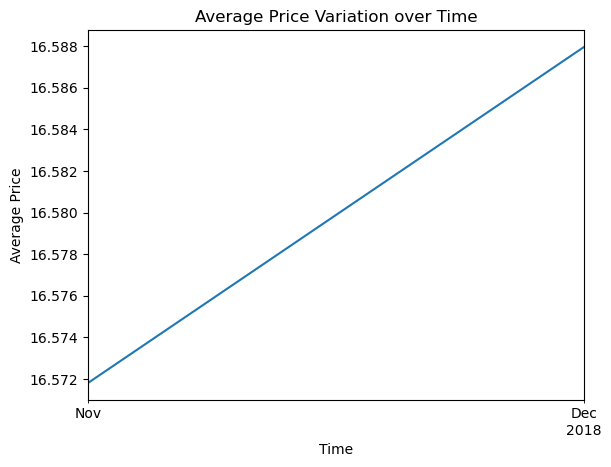

In [30]:
# Set the 'datetime' column as the index
data.set_index('datetime', inplace=True)

# Resample the data by a specific time period (e.g., month) and calculate the average price
average_prices = data['price'].resample('M').mean()

# Plot a line graph
average_prices.plot(kind='line')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.title('Average Price Variation over Time')

# Display the plot
plt.show()


## How do surge multipliers impact transportation prices during peak demand periods

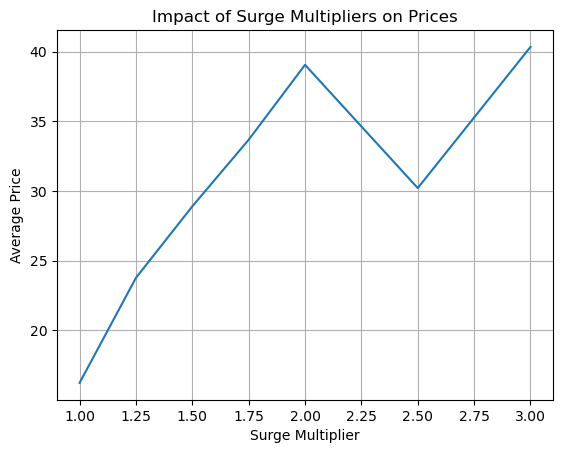

In [31]:
# Group the data by surge multipliers and calculate the average price for each surge multiplier
average_prices = data.groupby('surge_multiplier')['price'].mean()

# Plot a line graph
average_prices.plot(kind='line')

# Customize the plot
plt.xlabel('Surge Multiplier')
plt.ylabel('Average Price')
plt.title('Impact of Surge Multipliers on Prices')
plt.grid(True)

# Display the plot
plt.show()

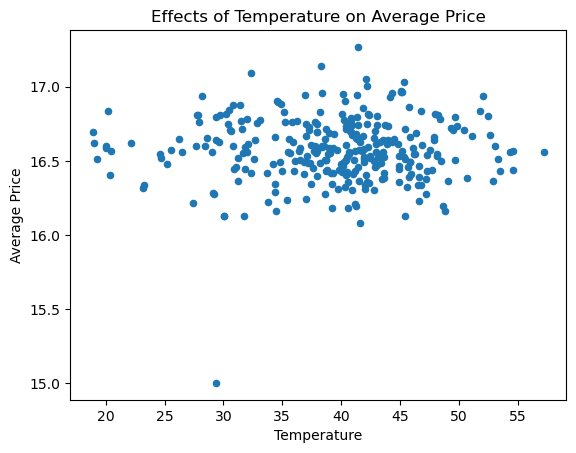

In [36]:
# Calculate the average price for each temperature
average_prices = data.groupby('temperature')['price'].mean().reset_index()

# Plot a scatter plot
average_prices.plot.scatter(x='temperature', y='price')

# Customize the plot
plt.xlabel('Temperature')
plt.ylabel('Average Price')
plt.title('Effects of Temperature on Average Price')

# Display the plot
plt.show()



In [ ]:
d = data.groupby('cab_type')['price']

In [37]:
affected_data = data[(data['short_summary'].notnull()) | (data['name'].notnull())]

# Print the unique mentions of events and weather conditions
event_mentions = affected_data['name'].unique()
weather_mentions = affected_data['short_summary'].unique()

print("Events:")
for event in event_mentions:
    print(event)

print("\nWeather Conditions:")
for weather in weather_mentions:
    print(weather)

Events:
Shared
Lux
Lyft
Lux Black XL
Lyft XL
Lux Black
UberXL
Black
UberX
WAV
Black SUV
UberPool
Taxi

Weather Conditions:
 Mostly Cloudy 
 Rain 
 Clear 
 Partly Cloudy 
 Overcast 
 Light Rain 
 Foggy 
 Possible Drizzle 
 Drizzle 


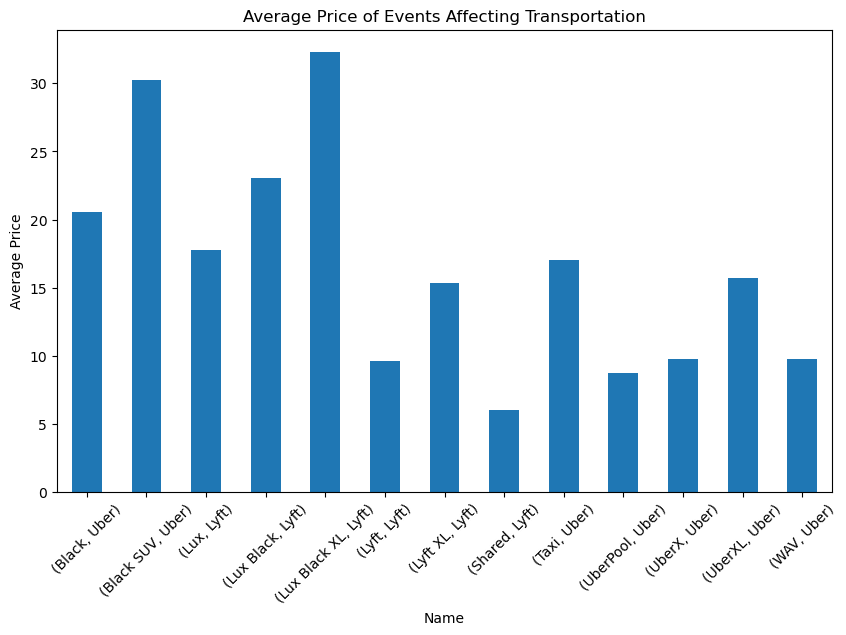

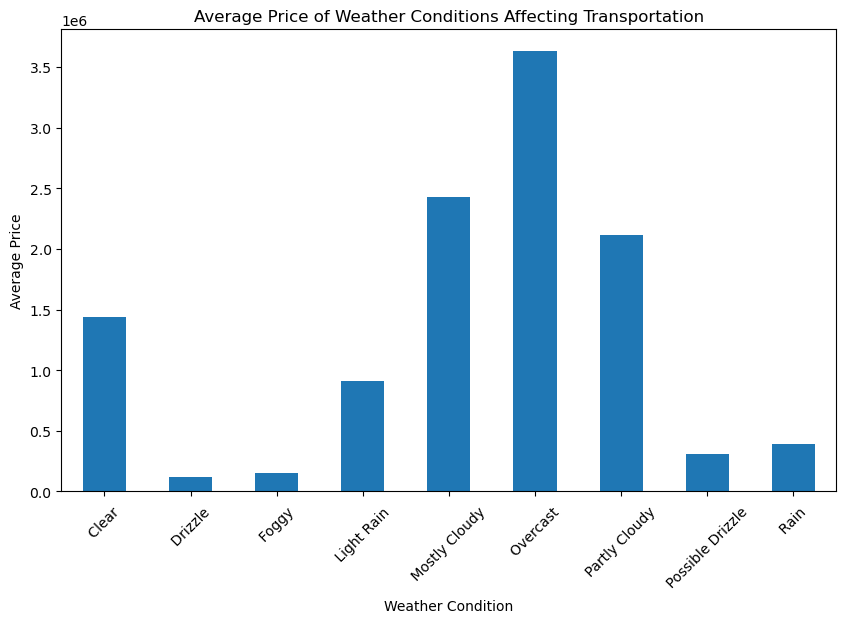

In [51]:
# Filter the data for rows where events or weather conditions are mentioned
affected_data = data[(data['short_summary'].notnull()) | (data['name'].notnull())]

# Calculate the sum of prices for each event and cab type combination
event_cab_avg_price = affected_data.groupby(['name', 'cab_type'])['price'].mean()

# Calculate the average price for each weather condition
weather_avg_price = affected_data.groupby('short_summary')['price'].sum()

# Count the occurrences of each event and weather condition
event_counts = affected_data['name'].value_counts()
weather_counts = affected_data['short_summary'].value_counts()

# Plot a bar plot for events with average price on the y-axis
plt.figure(figsize=(10, 6))
event_cab_avg_price.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Average Price')
plt.title('Average Price of Events Affecting Transportation')
plt.xticks(rotation=45)
plt.show()

# Plot a bar plot for weather conditions with average price on the y-axis
plt.figure(figsize=(10, 6))
weather_avg_price.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Average Price')
plt.title('Average Price of Weather Conditions Affecting Transportation')
plt.xticks(rotation=45)
plt.show()


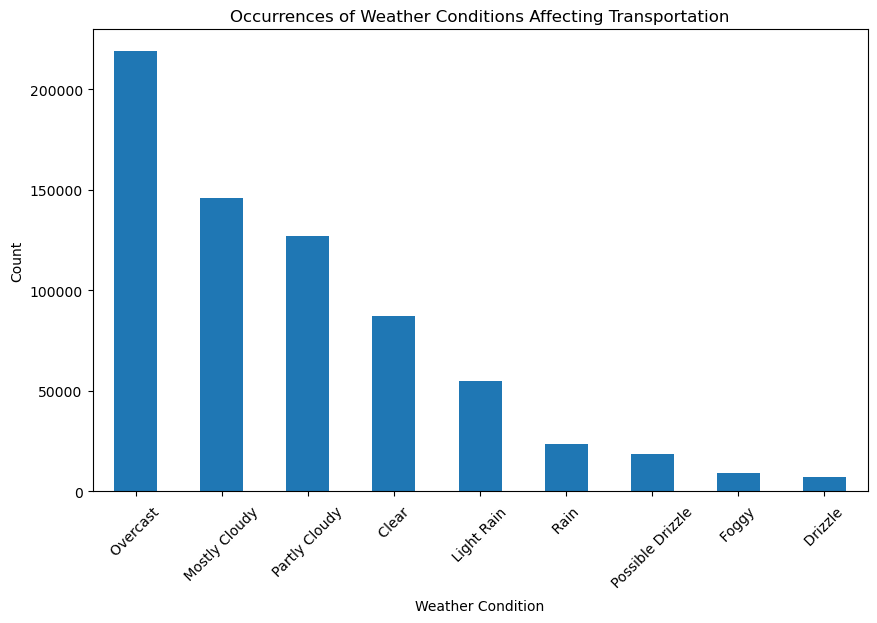

In [55]:
# Filter the data for rows where events or weather conditions are mentioned
affected_data = data[(data['short_summary'].notnull()) | (data['name'].notnull())]


weather_counts = affected_data['short_summary'].value_counts()



# Plot a bar plot for weather conditions
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Occurrences of Weather Conditions Affecting Transportation')
plt.xticks(rotation=45)
plt.show()
